In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [3]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [16]:
evaluation_datasets = [
    "D3RLPY-RT-0.1M-1-P0_100000",
    "D3RLPY-RT-0.2M-1-P0_100000",
    "D3RLPY-RT-0.5M-1-P0_100000",
    "D3RLPY-RT-1M-1-P0_100000",
    "D3RLPY-RT-2M-1-P0_100000",
    "D4RL-HC-M_100000",
    "D4RL-HC-ME_100000",
    "D4RL-HC-MR_100000",
    "D4RL-HC-R_100000",
    "SAC-RT-0.1M-0-P0_100000",
    "SAC-RT-0.25M-1-P0_100000",
    "SAC-RT-0.5M-1-P0_100000",
    "SAC-RT-1M-1-P0_100000",
    "SAC-RT-2M-1-P0_100000",
    "SAC-RT-3M-1-P0_100000",
    "RAND-1",
    "RAND-2",
    "RAND-3",
]

training_datasets = [
    "D3RLPY-RT-0.1M-1-P0_100000",
    "D3RLPY-RT-0.2M-1-P0_100000",
    "D3RLPY-RT-0.5M-1-P0_100000",
    "D3RLPY-RT-1M-1-P0_100000",
    "D3RLPY-RT-2M-1-P0_100000",
]

experiments_01_steps = ['MP449', 'MP450', 'MP451']
experiments_02_steps = ['MP452', 'MP453', 'MP454']
experiments_05_steps = ['MP455', 'MP456', 'MP457']
experiments_1_steps  = ['MP458', 'MP459', 'MP460']
experiments_2_steps  = ['MP533', 'MP534', 'MP535']

labels = ['0.1M Steps', '0.2M Steps', '0.5M Steps', '1M Steps', '2M Steps']

In [17]:
scores_01_steps_df = get_scores_df(experiments_01_steps, evaluation_datasets)
scores_02_steps_df = get_scores_df(experiments_02_steps, evaluation_datasets)
scores_05_steps_df = get_scores_df(experiments_05_steps, evaluation_datasets)
scores_1_steps_df = get_scores_df(experiments_1_steps, evaluation_datasets)
scores_2_steps_df = get_scores_df(experiments_2_steps, evaluation_datasets)

In [20]:
scores_01_steps_groups = (
    scores_01_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_01_steps_avgs_df = scores_01_steps_groups.mean().reset_index()
scores_01_steps_mins_df = scores_01_steps_groups.min().reset_index()
scores_01_steps_maxs_df = scores_01_steps_groups.max().reset_index()

scores_02_steps_groups = (
    scores_02_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_02_steps_avgs_df = scores_02_steps_groups.mean().reset_index()
scores_02_steps_mins_df = scores_02_steps_groups.min().reset_index()
scores_02_steps_maxs_df = scores_02_steps_groups.max().reset_index()

scores_05_steps_groups = (
    scores_05_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_05_steps_avgs_df = scores_05_steps_groups.mean().reset_index()
scores_05_steps_mins_df = scores_05_steps_groups.min().reset_index()
scores_05_steps_maxs_df = scores_05_steps_groups.max().reset_index()

scores_1_steps_groups = (
    scores_1_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_1_steps_avgs_df = scores_1_steps_groups.mean().reset_index()
scores_1_steps_mins_df = scores_1_steps_groups.min().reset_index()
scores_1_steps_maxs_df = scores_1_steps_groups.max().reset_index()

scores_2_steps_groups = (
    scores_2_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_2_steps_avgs_df = scores_2_steps_groups.mean().reset_index()
scores_2_steps_mins_df = scores_2_steps_groups.min().reset_index()
scores_2_steps_maxs_df = scores_2_steps_groups.max().reset_index()

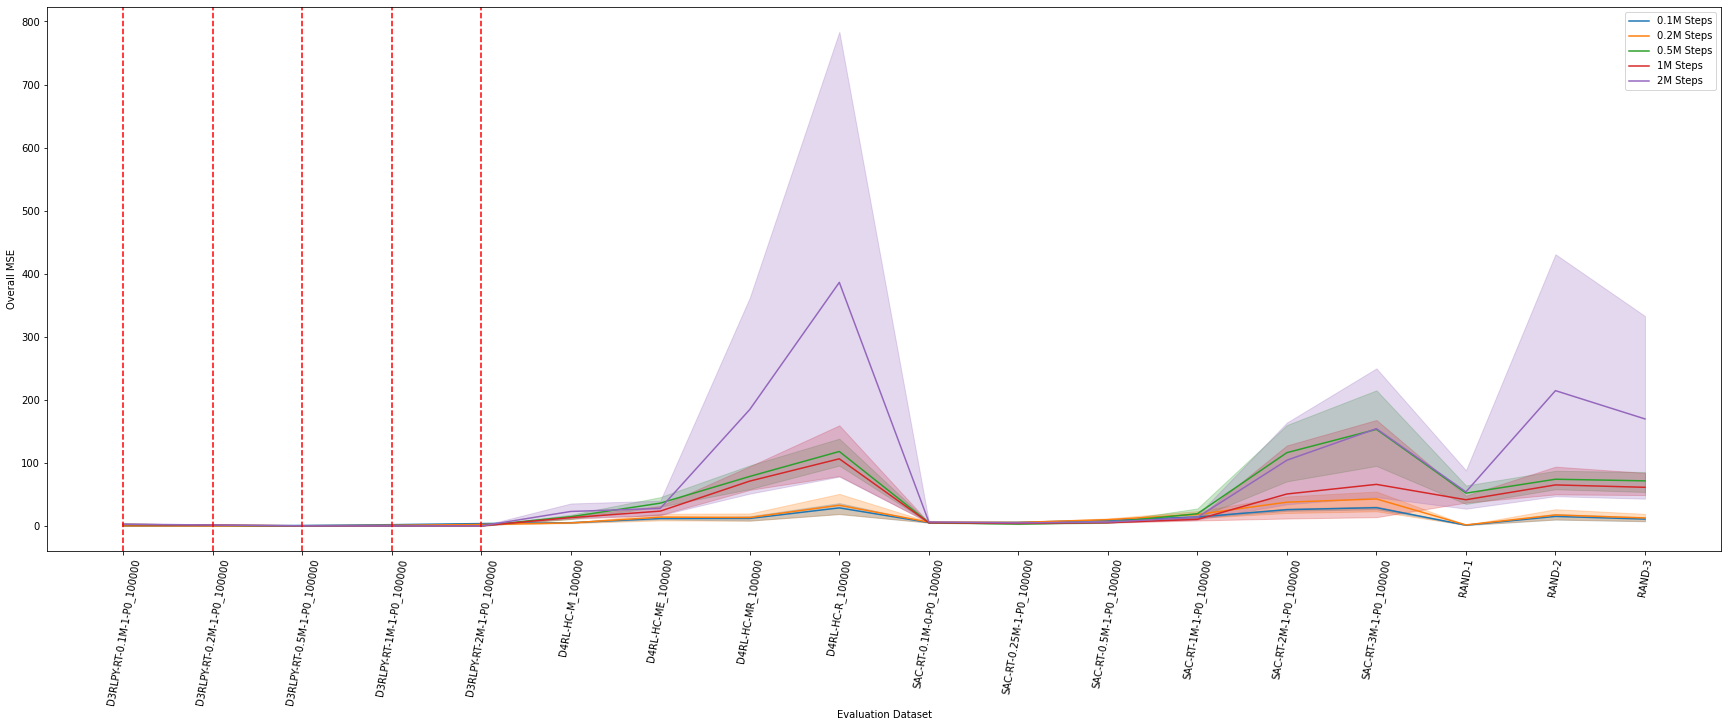

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

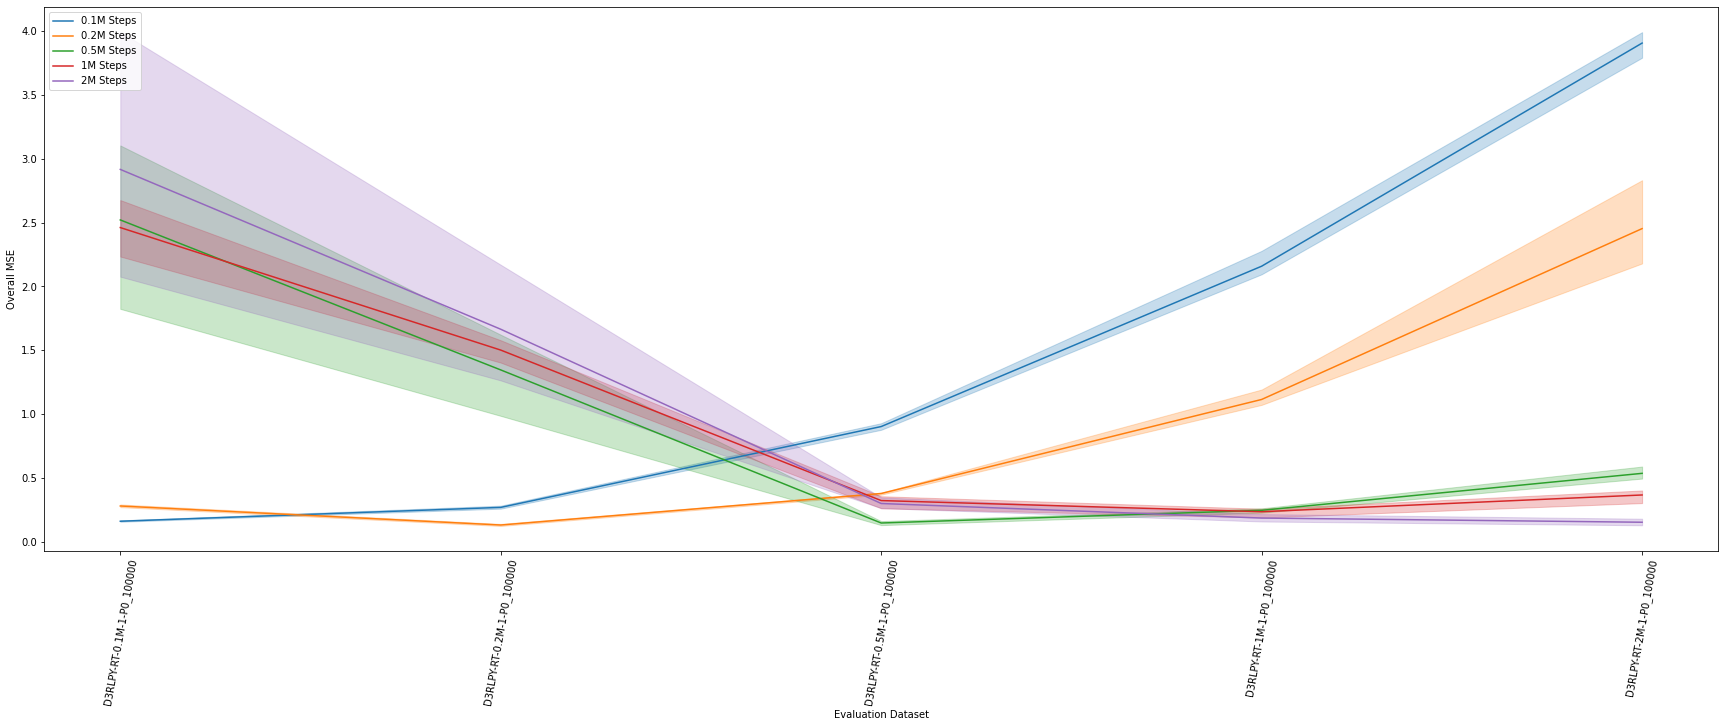

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

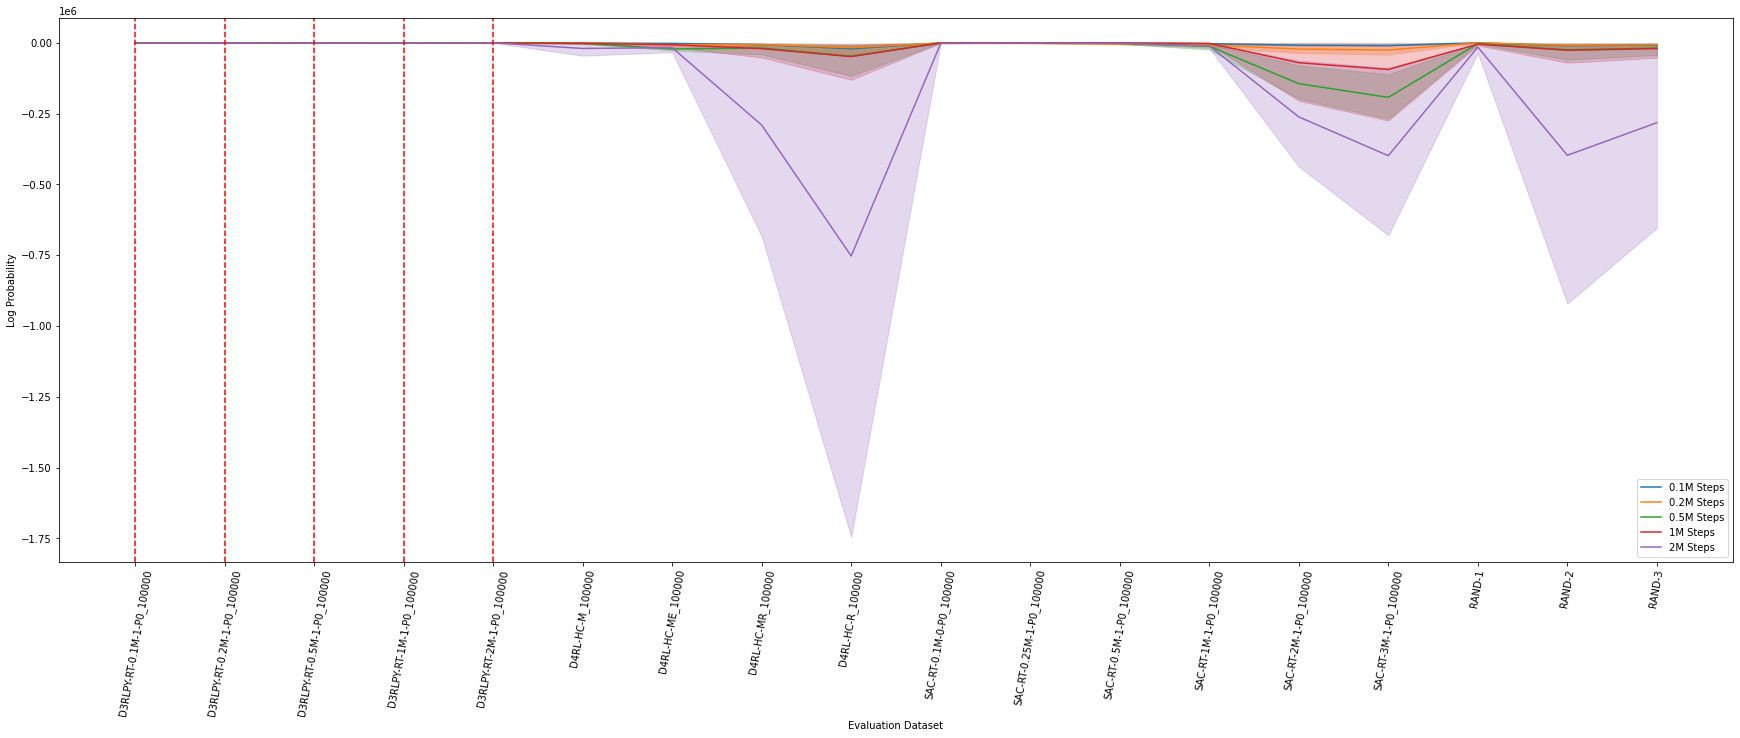

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

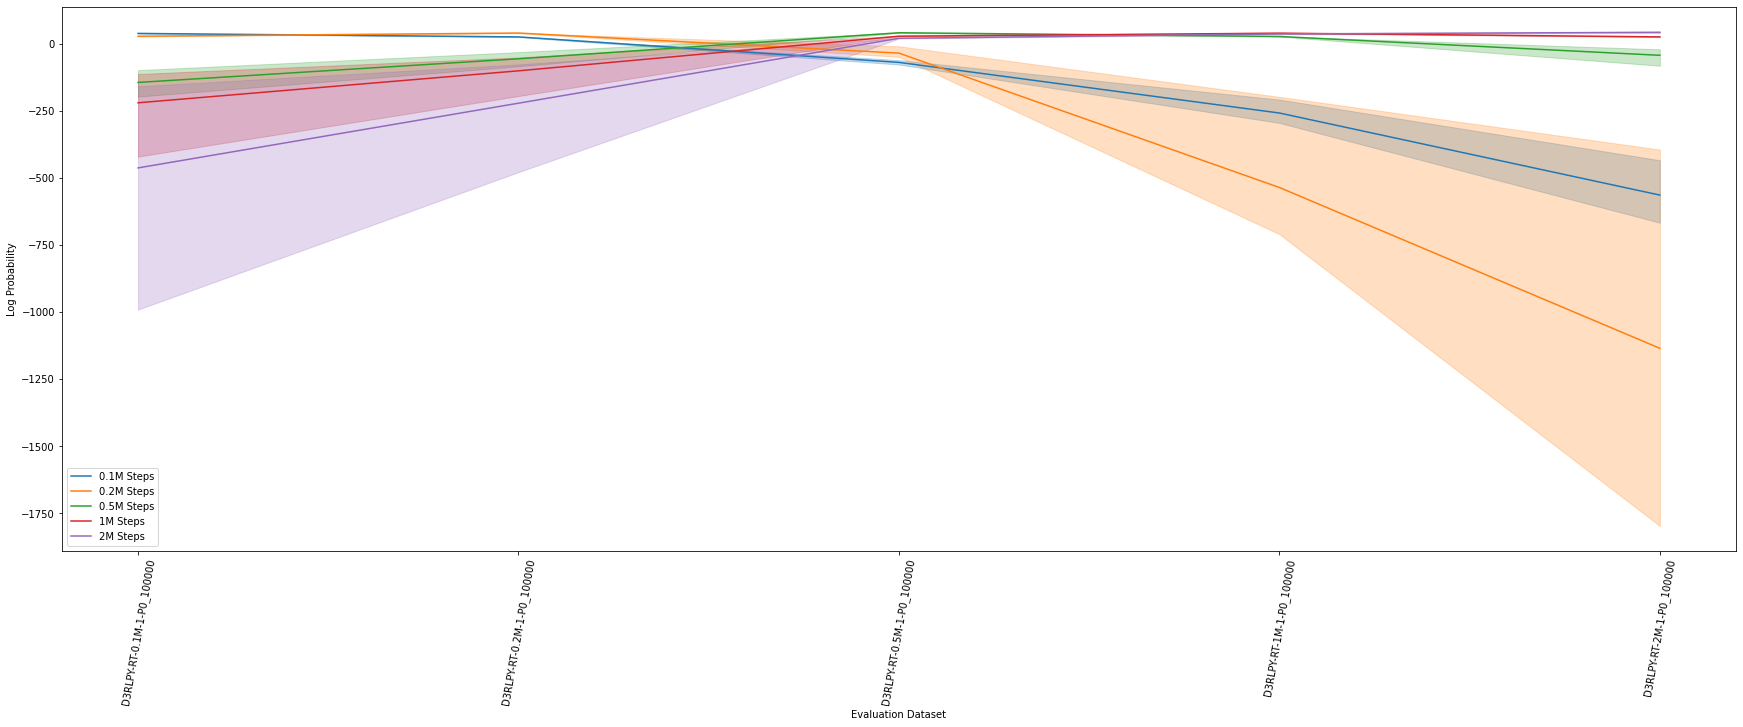

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()